In [80]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import datasets
import matplotlib.pyplot as plt

# best to split the data into a train & test batch (75:25 or similar)

In [81]:
# using sklean diabetes dataset
data_X, data_y = datasets.load_diabetes(return_X_y=True)
n = 10
m = len(data_y)
# peaking into the dataset
print(data_X.shape, data_y.shape)
print(data_X[0:5], data_y[0:5])
print(n, m)
print(np.min(data_y), np.max(data_y), np.mean(data_y))

(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]] [151.  75. 141. 206. 135.]
10 442
25.0 346.0 152.13348416289594


In [82]:
# function to predict y
def predict(weights, Xs):
    return weights[0] + weights[1:].T.dot(Xs)

# evaluate total cost (predictions of entire dataset)
def cost_function(weights, X):
    losses = []
    for i in range(m):
        losses.append((predict(weights, X[i])-data_y[i])**2)
    return (1/m)*np.sum(losses)

# get derivative with respect to each individual weight
def derive_cost(weights, X):
    H = 0.0000001
    derivatives = np.zeros(n+1)
    for i in range(n+1):
        temp = np.copy(weights)
        temp[i] = temp[i]+H
        a = cost_function(temp, X) - cost_function(weights, X)
        derivatives[i] = a/H
    return derivatives

In [83]:
def absolute_loss(weights, X):
    losses = np.zeros(m)
    for i in range(m):
        losses[i] = abs(predict(weights, X[i])-data_y[i])
    return losses

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
11


100%|███████████████████████████████████████| 1696/1696 [04:54<00:00,  5.76it/s]


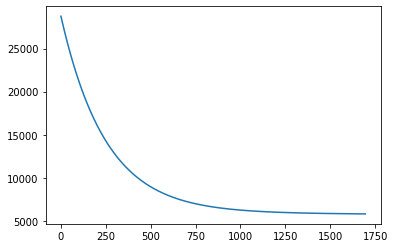

In [84]:
lr = 0.001
n_epochs = 1696

my_weights = np.ones(n + 1)
print(my_weights)

los = []
abslos = []

print(len(derive_cost(my_weights, data_X)))
for epoch in tqdm(range(n_epochs)):
    
    temp_weights = np.copy(my_weights)
    for i in range(len(temp_weights)):
        temp_weights[i] = temp_weights[i]-derive_cost(my_weights, data_X)[i]*lr
        
    los.append(cost_function(my_weights, data_X))
    abslos.append(absolute_loss(my_weights, data_X))
        
    my_weights = np.copy(temp_weights)

plt.plot(los)

In [86]:
from random import randint


def display_loss_stats():
    losses = absolute_loss(my_weights, data_X)
    print(np.min(losses), np.max(losses), np.mean(losses))

# evaluate results and compare with labels
print(my_weights)
evals = []
for i in range(m):
    evals.append(predict(my_weights, data_X[i]))
# quickly display n random comparisons using updated weights
for i in range(5):
    r = randint(0, m)
    print("prediction {} [{}] :".format(i, r), predict(my_weights, data_X[r]), data_y[r], end='')
    print("(absolute loss = {})".format(np.abs(predict(my_weights, data_X[r])-data_y[r])))

print(np.sum(absolute_loss(my_weights, data_X)))
display_loss_stats()

[147.06639209   3.26868107   1.48588419   8.18643794   6.39505853
   3.54173284   3.07272446  -3.82766781   6.23190131   7.91601297
   5.65383192]
prediction 0 [158] : 145.46771512933594 96.0(absolute loss = 49.46771512933594)
prediction 1 [154] : 147.72839320603396 197.0(absolute loss = 49.27160679396604)
prediction 2 [290] : 149.0945445241684 332.0(absolute loss = 182.9054554758316)
prediction 3 [5] : 144.246817152173 97.0(absolute loss = 47.24681715217301)
prediction 4 [160] : 145.049378381855 53.0(absolute loss = 92.049378381855)
28518.74979983506
0.18301193555120676 197.62795457248052 64.52205837066755
